In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
flowers = pd.DataFrame(iris.data,columns=iris.feature_names)
print(flowers.keys())
flowers.head()


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
print(iris.target)
#adding to the data frame the target
flowers['target']=iris.target
corr_matrix = flowers.corr().round(2)
sns.heatmap(corr_matrix,annot=True)
# sepal lenght,petal width, petal lenght have a high correlation with the target


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'petal width in cm')

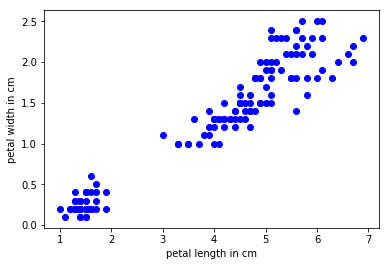

In [6]:
#visualice the data 
x = flowers['petal length (cm)']
y = flowers['petal width (cm)']
plt.scatter(x,y,color='b')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
#seeing the data
#there's in the end a better graph made using PCA

In [38]:
# train the classifier
X = flowers[['sepal length (cm)','petal length (cm)','petal length (cm)']]
Y = flowers['target']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

from sklearn.tree import DecisionTreeClassifier
a = DecisionTreeClassifier().fit(x_train,y_train)
print("the score of DesicionTreeClassifier is:",a.score(x_test,y_test))
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier().fit(x_train,y_train)
print("the score of KNeighborsClassifier is:",a.score(x_test,y_test))
from sklearn.naive_bayes import GaussianNB
a = GaussianNB().fit(x_train,y_train)
print("the score of gaussianNB is:",a.score(x_test,y_test))
from sklearn.svm import SVC
a = SVC(kernel='rbf',gamma = 0.7).fit(x_test,y_test)
print("the score of SVC is:",a.score(x_test,y_test))


the score of DesicionTreeClassifier is: 0.9210526315789473
the score of KNeighborsClassifier is: 0.9473684210526315
the score of gaussianNB is: 0.8947368421052632
the score of SVC is: 0.8947368421052632


the best model was Kneighborsclassifier with a 94% of accuracy :O, let's plot that!


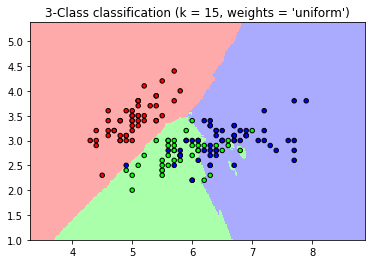

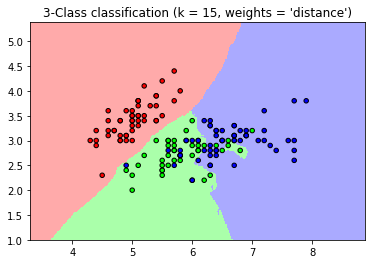

In [8]:
print("the best model was Kneighborsclassifier with a 94% of accuracy :O, let's plot that!")
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
# the code below is from the sklearn KNN documentation: ---> https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html


n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [50]:
#now I'll use PCA 
from sklearn.preprocessing import StandardScaler

features = ['sepal length (cm)','petal length (cm)','petal length (cm)']
#separating features and labels
x = flowers.loc[:,features].values
y = flowers.loc[:,['target']].values

#standarizing features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalc = pca.fit_transform(x)

principaldf = pd.DataFrame(principalc,columns = ['PC1','PC2'])

#graph in 2d, projection into a new 2d space

finalDf = pd.concat([principaldf, flowers[['target']]], axis = 1)
finalDf.head()


,PC1,PC2,target
0,-2.075191,-0.311805,0
1,-2.210571,-0.110810,0
2,-2.412618,0.045281,0
3,-2.346972,0.235587,0
4,-2.142881,-0.211307,0


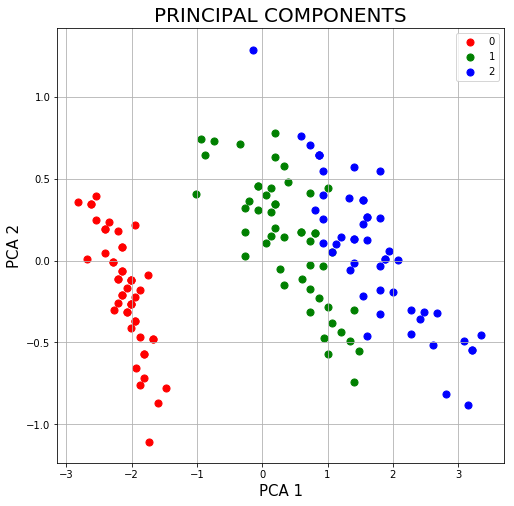

In [43]:
targets = [0,1,2]
colors = ['r','g','b']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
ax.set_title('PRINCIPAL COMPONENTS', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = flowers['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



In [60]:
#lets classify this but with only 2 dimensions
x_train, x_test, y_train, y_test = train_test_split(principalc,y,random_state=0)

from sklearn.tree import DecisionTreeClassifier
a = DecisionTreeClassifier().fit(x_train,y_train)
print("the score of DesicionTreeClassifier is:",a.score(x_test,y_test))
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier().fit(x_train,y_train)
print("the score of KNeighborsClassifier is:",a.score(x_test,y_test))
from sklearn.naive_bayes import GaussianNB
a = GaussianNB().fit(x_train,y_train)
print("the score of gaussianNB is:",a.score(x_test,y_test))
from sklearn.svm import SVC
a = SVC(kernel='rbf',gamma = 0.7).fit(x_test,y_test)
print("the score of SVC is:",a.score(x_test,y_test))
print("\nthe accuracy of each model is similar to the trained models without pca,")
print("the pca is more usefull in datasets with high number of samples and features")
pca.explained_variance_ratio

the score of DesicionTreeClassifier is: 0.8157894736842105
the score of KNeighborsClassifier is: 0.9473684210526315
the score of gaussianNB is: 0.8157894736842105
the score of SVC is: 0.8947368421052632

the accuracy of each model is similar to the trained models without pca,
the pca is more usefull in datasets with high number of samples and features


C:\Users\SirSantiago\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\SirSantiago\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SirSantiago\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'PCA' object has no attribute 'explained_variance_ratio'